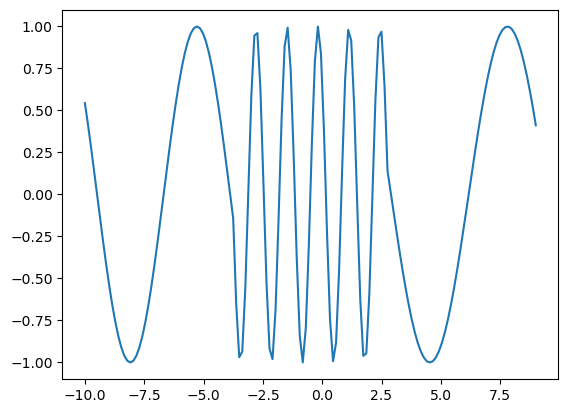

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.concatenate([np.linspace(-10, -3, 50), np.zeros(50), np.linspace(3, 9, 50)])
x2 = np.concatenate([np.zeros(50), np.linspace(-3, 3, 50), np.zeros(50)])
y = np.sin(x1) + np.sin(5*x2)
plt.plot(np.linspace(-10, 9, 150), y)

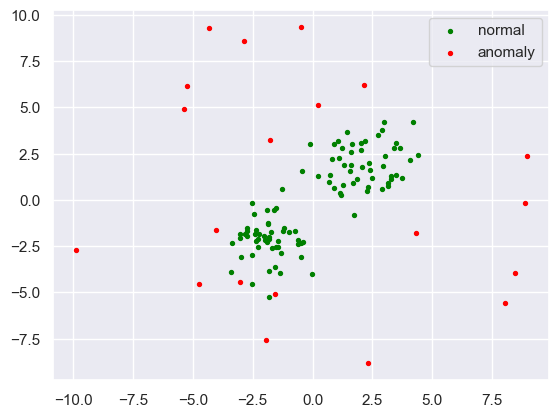

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(123)

#平均と分散
mean1 = np.array([2, 2])
mean2 = np.array([-2,-2])
cov = np.array([[1, 0], [0, 1]])

# 正常データの生成(2つの正規分布から生成)
norm1 = np.random.multivariate_normal(mean1, cov, size=50)
norm2 = np.random.multivariate_normal(mean2, cov, size=50)
norm = np.vstack([norm1, norm2])

# 異常データの生成(一様分布から生成)
lower, upper = -10, 10
anom = (upper - lower)*np.random.rand(20,20) + lower

s=8
plt.scatter(norm[:,0], norm[:,1], s=s, color='green', label='normal')
plt.scatter(anom[:,0], anom[:,1], s=s, color='red', label='anomaly')
plt.legend()

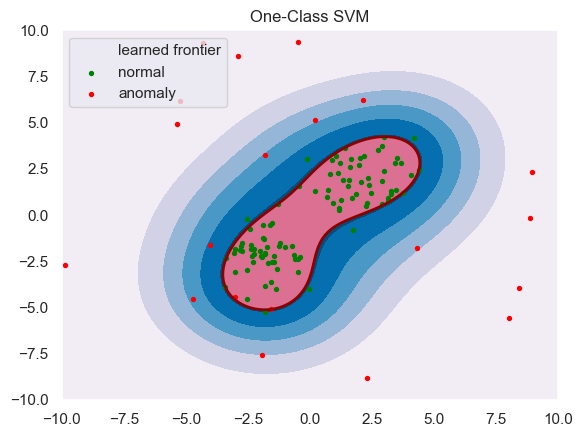

In [3]:
from sklearn import svm
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(norm)

def draw_boundary(norm, anom, clf):
    # plot the line, the points, and the nearest vectors to the plane
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.title("One-Class SVM")
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.PuBu)
    bd = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

    nm = plt.scatter(norm[:, 0], norm[:, 1], c='green', s=s)
    am = plt.scatter(anom[:, 0], anom[:, 1], c='red', s=s)

    plt.axis('tight')
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.legend([bd.collections[0], nm, am],
               ["learned frontier", "normal", "anomaly"],
               loc="upper left",
               prop=matplotlib.font_manager.FontProperties(size=11))
    plt.show()

draw_boundary(norm, anom, clf)